# Multiple Linear Regression

## Bike Sharing Case Study

### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

## Step 1: Reading and Understanding Data

Import NumPy and Pandas and read the dataset of daily bike demands across the American market

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the packages

import numpy as np
import pandas as pd

In [3]:
# read the dataset

bikes_data = pd.read_csv("day.csv")

In [4]:
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bikes_data.shape

(730, 16)

In [6]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bikes_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Observations: 
1. Bike Dataset has 730 rows and 16 columns
2. Only one column in date type and all other columns are float or integer type
3. There are some columns which are categorical in nature but are present in float or int type. e.g. season, weathersit, etc
4. There are no missing or null values in data set
5. Target variable is 'cnt'

## Step 2: Visualising the Data

Import matplotlib and seaborn for visualising the data

In [8]:
# import the packages

import matplotlib.pyplot as plt
import seaborn as sns

Let's rename the columns for better understanding of the dataset

In [9]:
# rename the columns to actual names for better understanding

bikes_data.columns = ['Index', 'Day', 'Season', 'Year', 'Month', 'Holiday', 'Weekday', 'WorkingDay', 'Weather', 'Temperature', 'FeelsLikeTemperature', 'Humidity', 'WindSpeed', 'Casual', 'Registered', 'Count']
bikes_data.columns

Index(['Index', 'Day', 'Season', 'Year', 'Month', 'Holiday', 'Weekday',
       'WorkingDay', 'Weather', 'Temperature', 'FeelsLikeTemperature',
       'Humidity', 'WindSpeed', 'Casual', 'Registered', 'Count'],
      dtype='object')

In [10]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 730 non-null    int64  
 1   Day                   730 non-null    object 
 2   Season                730 non-null    int64  
 3   Year                  730 non-null    int64  
 4   Month                 730 non-null    int64  
 5   Holiday               730 non-null    int64  
 6   Weekday               730 non-null    int64  
 7   WorkingDay            730 non-null    int64  
 8   Weather               730 non-null    int64  
 9   Temperature           730 non-null    float64
 10  FeelsLikeTemperature  730 non-null    float64
 11  Humidity              730 non-null    float64
 12  WindSpeed             730 non-null    float64
 13  Casual                730 non-null    int64  
 14  Registered            730 non-null    int64  
 15  Count                 7

In [11]:
bikes_data.describe()

,Index,Season,Year,Month,Holiday,Weekday,WorkingDay,Weather,Temperature,FeelsLikeTemperature,Humidity,WindSpeed,Casual,Registered,Count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Observations:
There are some columns which are redundant, so we can remove them
1. Column 'Index' contains only the index of the row. So this column can be dropped.
2. Column 'Day' contains the date. But we already have two columns Year and Month having the same data. So we can drop this column.
3. Columns 'Casual' and 'Registered' contains the count of bikes booked by specific category of customer. But our target variable is total Count of bikes booked and not the count of bikes booked by specific customers. Column 'Count' has the total number of bikes booked by customer which is the addition of columns Casual and Registered. So we can drop these two columns.

In [12]:
# drop the redundant columns

bikes_data = bikes_data.drop(['Index'], axis=1)
bikes_data = bikes_data.drop(['Day'], axis=1)
bikes_data = bikes_data.drop(['Casual'], axis=1)
bikes_data = bikes_data.drop(['Registered'], axis=1)
bikes_data.head()

,Season,Year,Month,Holiday,Weekday,WorkingDay,Weather,Temperature,FeelsLikeTemperature,Humidity,WindSpeed,Count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season                730 non-null    int64  
 1   Year                  730 non-null    int64  
 2   Month                 730 non-null    int64  
 3   Holiday               730 non-null    int64  
 4   Weekday               730 non-null    int64  
 5   WorkingDay            730 non-null    int64  
 6   Weather               730 non-null    int64  
 7   Temperature           730 non-null    float64
 8   FeelsLikeTemperature  730 non-null    float64
 9   Humidity              730 non-null    float64
 10  WindSpeed             730 non-null    float64
 11  Count                 730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [14]:
bikes_data.describe()

,Season,Year,Month,Holiday,Weekday,WorkingDay,Weather,Temperature,FeelsLikeTemperature,Humidity,WindSpeed,Count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#### Observations:
1. From data dictionary, we can see that there are some columns which are categorical in nature but represented as numeric in dataset. 
2. Variables that are Categorical in nature: Season, Year, Month, Holiday, Weekday, WorkingDay, Weather

Let's map actual values from data dictionary to above columns before visualising the data

In [15]:
# assign actual values to the categorical variable as per the data dictionary

bikes_data['Season'] = bikes_data['Season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bikes_data['Year'] = bikes_data['Year'].map({0: '2018', 1:'2019'})
bikes_data['Month'] = bikes_data['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bikes_data['Holiday'] = bikes_data['Holiday'].map({0:'No',1:'Yes'})
bikes_data['Weekday'] = bikes_data['Weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})
bikes_data['WorkingDay'] = bikes_data['WorkingDay'].map({0:'No',1:'Yes'})
bikes_data['Weather'] = bikes_data['Weather'].map({1:"Good/Clear",2:'Moderate/Misty',3:'Bad/LightRain',4:'Worst/HeavyRain'})

In [16]:
bikes_data.head()

,Season,Year,Month,Holiday,Weekday,WorkingDay,Weather,Temperature,FeelsLikeTemperature,Humidity,WindSpeed,Count
0,spring,2018,Jan,No,Sun,No,Moderate/Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No,Mon,No,Moderate/Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No,Tues,Yes,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No,Wed,Yes,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No,Thurs,Yes,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season                730 non-null    object 
 1   Year                  730 non-null    object 
 2   Month                 730 non-null    object 
 3   Holiday               730 non-null    object 
 4   Weekday               730 non-null    object 
 5   WorkingDay            730 non-null    object 
 6   Weather               730 non-null    object 
 7   Temperature           730 non-null    float64
 8   FeelsLikeTemperature  730 non-null    float64
 9   Humidity              730 non-null    float64
 10  WindSpeed             730 non-null    float64
 11  Count                 730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


#### Observations:
So now we have 5 Numerical variables and 7 Categorical Variables.
1. Numeric variables: Temperature, FeelsLikeTemperature, Humidity, WindSpeed, Count
2. Categorical variables: Season, Year, Month, Holiday, Weekday, WorkingDay, Weather

#### Visualising Numeric Variables
We will now make a pairplot of all the numeric variables

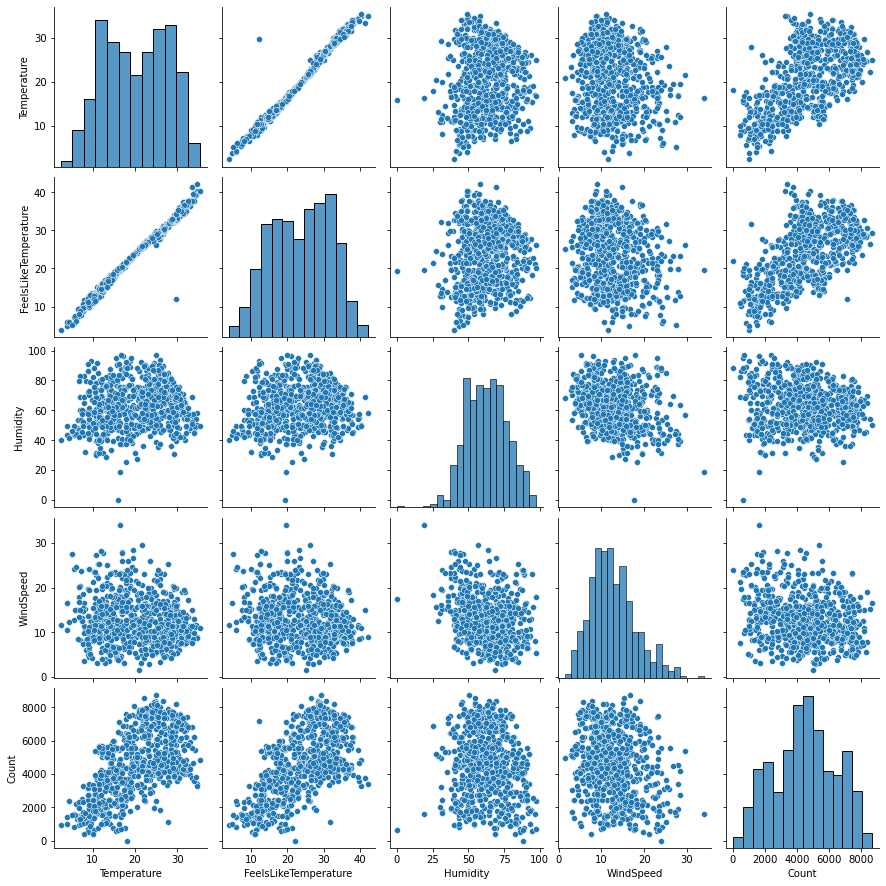

In [18]:
# plot pairplot of all numeric variables

sns.pairplot(bikes_data)
plt.show()

#### Visualising Categorical Variables
Let's make a boxplot of that all the categorical variables

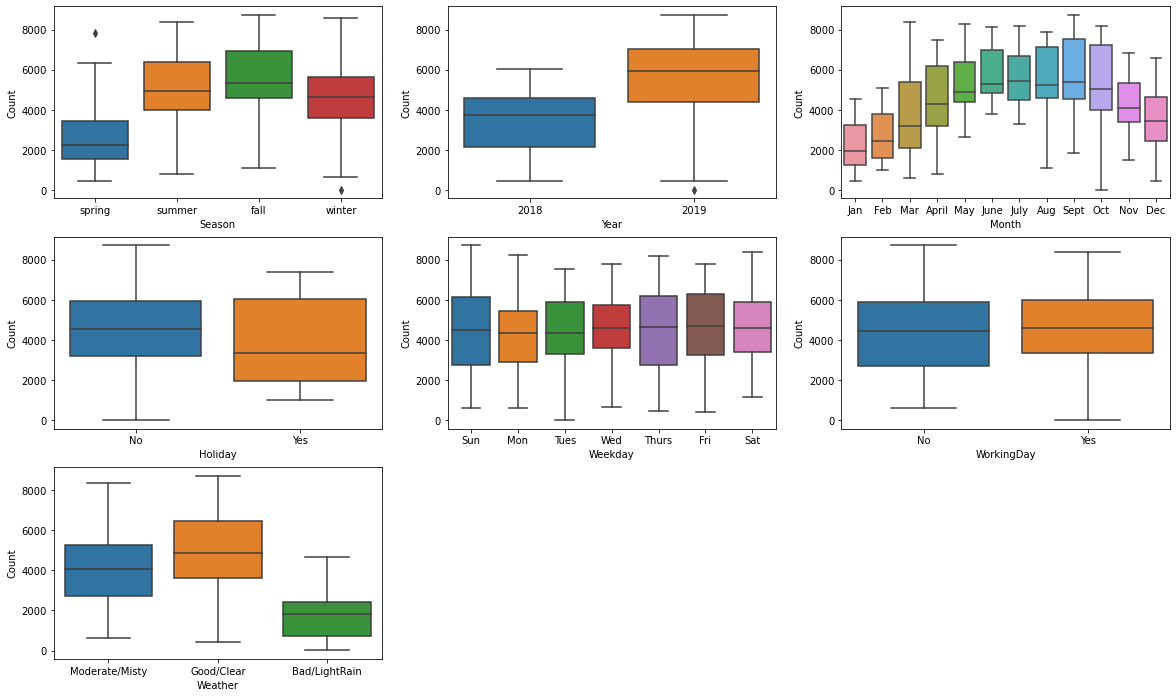

In [19]:
# plot boxplot of all the categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Season', y = 'Count', data = bikes_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'Year', y = 'Count', data = bikes_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'Month', y = 'Count', data = bikes_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'Holiday', y = 'Count', data = bikes_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'Weekday', y = 'Count', data = bikes_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'WorkingDay', y = 'Count', data = bikes_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'Weather', y = 'Count', data = bikes_data)
plt.show()

#### Observations:
1. In fall, there seems to be highest demand of rented the bikes, followed by Summer and Winter
2. Spring seems to be the least season where people rent bikes
3. Average rented bikes has increased in 2019 almost double that of 2018
4. There is almost similar average count of rented bikes in August, June, September, July followed by May, October. Company should make sure they prepare with high availability during these months
5. December, January, February have the least demand probably due to winter season
6. It looks like all days have similar demands
7. There are almost similar demands whether it's a working day or not
8. It clearly shows that if the weather is clear, the demand is more
9. If the weather is bad, demand decreases drastically
10. Company should leverage and look up for weather forecast to fullfill demands

## Step 3: Data Preperation

#### Observations:
1. There are 6 columns with values as string. But in order to fir Regression line, we would need numeric values and not string.
2. So we need to convert Binary Categorical variables to 1 and 0 and other Categorical variable to dummy values.
3. Below variables needs to be encoded for further analysis: 
    - Binary Categorical Variable: Holiday, WorkingDay
    - Other Categorical Variable: Season, Month, Weekday, Weather

##### Encode Binary Categorical Variables
- There are two Columns Holiday and WorkingDay with values 'Yes' or 'No'
- We need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [20]:
# List of binary variables to map

binaryvarlist = ['Holiday', 'WorkingDay']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to variables list
bikes_data[binaryvarlist] = bikes_data[binaryvarlist].apply(binary_map)

- There is one Column Year with values '2018' or '2019'
- As per data dictionary, We need to convert them to 1s and 0s, where 1 is a '2019' and 0 is a '2018'.

In [21]:
# List of binary variables to map

yearvarlist = ['Year']

# Defining the map function
def year_map(x):
    return x.map({'2019': 1, '2018': 0})

# Applying the function to variables list
bikes_data[yearvarlist] = bikes_data[yearvarlist].apply(year_map)

In [22]:
# Check the Bikes dataset now

bikes_data.head()

,Season,Year,Month,Holiday,Weekday,WorkingDay,Weather,Temperature,FeelsLikeTemperature,Humidity,WindSpeed,Count
0,spring,0,Jan,0,Sun,0,Moderate/Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,Moderate/Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tues,1,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Wed,1,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thurs,1,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600


##### Encode Other Categorical Variables
- There are four Columns Season, Month, Weekday and Weather with multiple levels values. We need to convert them to integer as well.
- So we will use Dummy variables for such columns.

In [23]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season                730 non-null    object 
 1   Year                  730 non-null    int64  
 2   Month                 730 non-null    object 
 3   Holiday               730 non-null    int64  
 4   Weekday               730 non-null    object 
 5   WorkingDay            730 non-null    int64  
 6   Weather               730 non-null    object 
 7   Temperature           730 non-null    float64
 8   FeelsLikeTemperature  730 non-null    float64
 9   Humidity              730 non-null    float64
 10  WindSpeed             730 non-null    float64
 11  Count                 730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [24]:
# Create Dummy variables for these categorical variables

SeasonCondition = pd.get_dummies(bikes_data['Season'], drop_first = True)
MonthUpdated = pd.get_dummies(bikes_data['Month'], drop_first = True)
DayOfWeek = pd.get_dummies(bikes_data['Weekday'], drop_first = True)
WeatherCondition = pd.get_dummies(bikes_data['Weather'], drop_first = True)

In [25]:
# Add the Dummy values to original dataframe

bikes_data = pd.concat([bikes_data, SeasonCondition], axis = 1)
bikes_data = pd.concat([bikes_data, MonthUpdated], axis = 1)
bikes_data = pd.concat([bikes_data, DayOfWeek], axis = 1)
bikes_data = pd.concat([bikes_data, WeatherCondition], axis = 1)
bikes_data.head()

,Season,Year,Month,Holiday,Weekday,WorkingDay,Weather,Temperature,FeelsLikeTemperature,Humidity,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Good/Clear,Moderate/Misty
0,spring,0,Jan,0,Sun,0,Moderate/Misty,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,1
1,spring,0,Jan,0,Mon,0,Moderate/Misty,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,1
2,spring,0,Jan,0,Tues,1,Good/Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,0,1,0
3,spring,0,Jan,0,Wed,1,Good/Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,1,0
4,spring,0,Jan,0,Thurs,1,Good/Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,0,1,0


In [26]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season                730 non-null    object 
 1   Year                  730 non-null    int64  
 2   Month                 730 non-null    object 
 3   Holiday               730 non-null    int64  
 4   Weekday               730 non-null    object 
 5   WorkingDay            730 non-null    int64  
 6   Weather               730 non-null    object 
 7   Temperature           730 non-null    float64
 8   FeelsLikeTemperature  730 non-null    float64
 9   Humidity              730 non-null    float64
 10  WindSpeed             730 non-null    float64
 11  Count                 730 non-null    int64  
 12  spring                730 non-null    uint8  
 13  summer                730 non-null    uint8  
 14  winter                730 non-null    uint8  
 15  Aug                   7

In [27]:
# Drop  the original columns as we have now created dummy values for those columns

bikes_data.drop(['Season'], axis = 1, inplace = True)
bikes_data.drop(['Month'], axis = 1, inplace = True)
bikes_data.drop(['Weekday'], axis = 1, inplace = True)
bikes_data.drop(['Weather'], axis = 1, inplace = True)

bikes_data.head()

,Year,Holiday,WorkingDay,Temperature,FeelsLikeTemperature,Humidity,WindSpeed,Count,spring,summer,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Good/Clear,Moderate/Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,1,0


In [28]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  730 non-null    int64  
 1   Holiday               730 non-null    int64  
 2   WorkingDay            730 non-null    int64  
 3   Temperature           730 non-null    float64
 4   FeelsLikeTemperature  730 non-null    float64
 5   Humidity              730 non-null    float64
 6   WindSpeed             730 non-null    float64
 7   Count                 730 non-null    int64  
 8   spring                730 non-null    uint8  
 9   summer                730 non-null    uint8  
 10  winter                730 non-null    uint8  
 11  Aug                   730 non-null    uint8  
 12  Dec                   730 non-null    uint8  
 13  Feb                   730 non-null    uint8  
 14  Jan                   730 non-null    uint8  
 15  July                  7

#### Observations:
- All columns of dataframe are now converted to numeric values.
- Now dataframe is ready for further analysis.

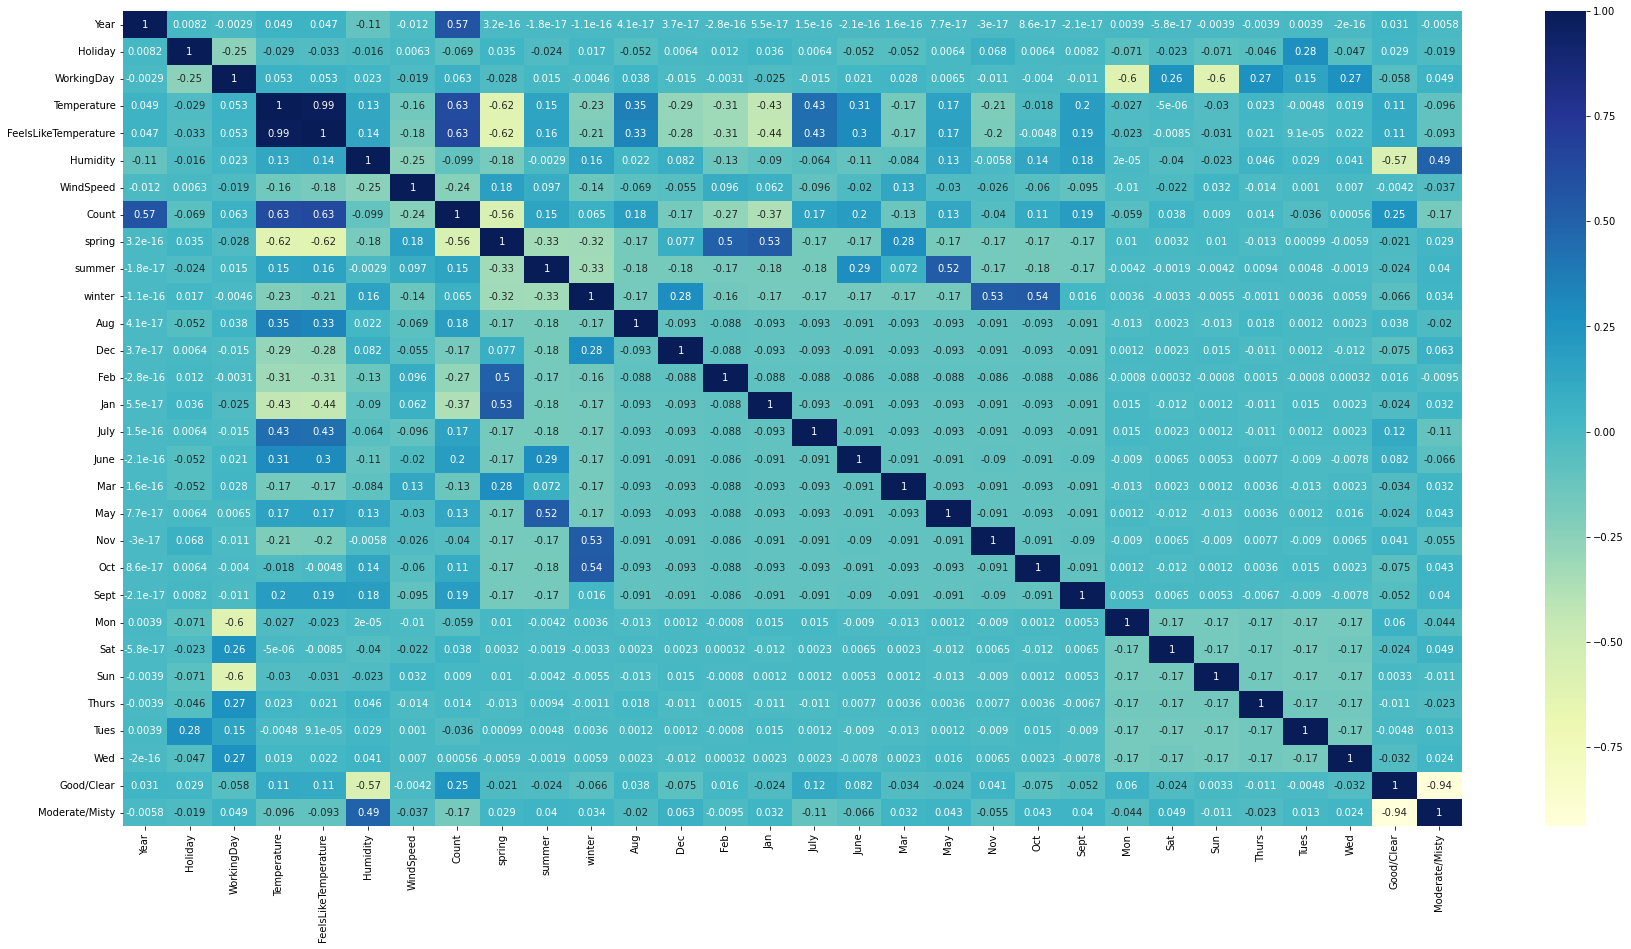

In [29]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 15))
sns.heatmap(bikes_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observations:
- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
- We will refer this map while building the linear model to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.
- Temperature and FeelsLike Temperature columns are highly correlated (0.99). So we can drop Temperature column.

In [30]:
# Drop Temperature column

bikes_data.drop(['Temperature'], axis = 1, inplace = True)
bikes_data.head()

,Year,Holiday,WorkingDay,FeelsLikeTemperature,Humidity,WindSpeed,Count,spring,summer,winter,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Good/Clear,Moderate/Misty
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [31]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  730 non-null    int64  
 1   Holiday               730 non-null    int64  
 2   WorkingDay            730 non-null    int64  
 3   FeelsLikeTemperature  730 non-null    float64
 4   Humidity              730 non-null    float64
 5   WindSpeed             730 non-null    float64
 6   Count                 730 non-null    int64  
 7   spring                730 non-null    uint8  
 8   summer                730 non-null    uint8  
 9   winter                730 non-null    uint8  
 10  Aug                   730 non-null    uint8  
 11  Dec                   730 non-null    uint8  
 12  Feb                   730 non-null    uint8  
 13  Jan                   730 non-null    uint8  
 14  July                  730 non-null    uint8  
 15  June                  7

## Step 4: Splitting the data into Training and Testing sets

Now data is ready. So we can perform a train-test-split with 70 - 30 ratio

In [32]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes_data, train_size = 0.7, test_size = 0.3, random_state = 100)

### Resacaling the Features

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

There are two ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

We will use MinMax scaling.

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['FeelsLikeTemperature', 'Humidity', 'WindSpeed', 'Count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
df_train.head()

,Year,Holiday,WorkingDay,FeelsLikeTemperature,Humidity,WindSpeed,Count,spring,summer,winter,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Good/Clear,Moderate/Misty
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [37]:
df_train.describe()

,Year,Holiday,WorkingDay,FeelsLikeTemperature,Humidity,WindSpeed,Count,spring,summer,winter,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Good/Clear,Moderate/Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.627451,0.343137
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [38]:
# Y train will be Count variable as it is the target variable
# X train will be all the variables other than Count variable

y_train = df_train.pop('Count')
X_train = df_train

In [39]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: Count, dtype: float64

In [40]:
X_train.head()

,Year,Holiday,WorkingDay,FeelsLikeTemperature,Humidity,WindSpeed,spring,summer,winter,Aug,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Good/Clear,Moderate/Misty
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


## Step 5: Building Linear Model

We will start with Recursive Feature Elimination (RFE) with 15 variables and then will continue with manual approach

In [41]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('Holiday', True, 1),
 ('WorkingDay', True, 1),
 ('FeelsLikeTemperature', True, 1),
 ('Humidity', True, 1),
 ('WindSpeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Aug', False, 2),
 ('Dec', False, 2),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sept', False, 2),
 ('Mon', True, 1),
 ('Sat', False, 2),
 ('Sun', True, 1),
 ('Thurs', False, 2),
 ('Tues', False, 2),
 ('Wed', False, 2),
 ('Good/Clear', True, 1),
 ('Moderate/Misty', True, 1)]

In [44]:
# Get the list of features which are selected by RFE (Supported columns)

col = X_train.columns[rfe.support_]
col

Index(['Year', 'Holiday', 'WorkingDay', 'FeelsLikeTemperature', 'Humidity',
       'WindSpeed', 'spring', 'winter', 'Jan', 'July', 'Mon', 'Sun',
       'Good/Clear', 'Moderate/Misty'],
      dtype='object')

In [45]:
# Get feature which are chosen by RFE during feature selection (un-supported columns)

X_train.columns[~rfe.support_]

Index(['summer', 'Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sept', 'Sat', 'Thurs', 'Tues', 'Wed'],
      dtype='object')

In [46]:
# Creating new dataframe with RFE selected variables

X_train_rfe = X_train[col]
X_train_rfe.head()

,Year,Holiday,WorkingDay,FeelsLikeTemperature,Humidity,WindSpeed,spring,winter,Jan,July,Mon,Sun,Good/Clear,Moderate/Misty
653,1,0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,1,0,0,1,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,0,1,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,1,0,1,0
482,1,0,0,0.391735,0.504508,0.188475,0,0,0,0,0,1,0,1


### Model 1:
Let's Create a model with the features selected by RFE

In [47]:
# importing statsmodels to add constant.

import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

In [48]:
# Create first model
lm = sm.OLS(y_train, X_train_lm1).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.51e-186
Time:                        16:26:58   Log-Likelihood:                 502.02
No. Observations:                 510   AIC:                            -976.0
Df Residuals:                     496   BIC:                            -916.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0544      0.037      1.460      0.145      -0.019       0.128
Year                     0.2321      0.008     28.112      0.000       0.216       0.248
Holiday                 -0.0473      0.023     -2.069      0.039      -0.092      -0.002
WorkingDay               0.0453      0.011      3.981      0.000       0.023       0.068
FeelsLikeTemperature     0.4944      0.033     14.785      0.000       0.429       0.560
Humidity                -0.1370      0.038     -3.565      0.000      -0.212      -0.061
WindSpeed               -0.1683      0.026     -6.432      0.000      -0.220      -0.117
spring                  -0.1068      0.015     -6.922      0.000      -0.137      -0.076
winter                   0.0440      0.012      3.553      0.000       0.020       0.068
Jan                     -0.0383      0.018     -2.148      0.032      -0.073      -0.003
July                    -0.0821      0.017     -4.797      0.000      -0.116      -0.048
Mon                      0.0006      0.014      0.044      0.965      -0.027       0.028
Sun                      0.0558      0.013      4.239      0.000       0.030       0.082
Good/Clear               0.2446      0.027      9.097      0.000       0.192       0.297
Moderate/Misty           0.1857      0.025      7.298      0.000       0.136       0.236
==============================================================================
Omnibus:                       63.180   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.106
Skew:                          -0.620   Prob(JB):                     8.52e-37
Kurtosis:                       5.506   Cond. No.                     1.38e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.73e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [49]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,WorkingDay,86.44
11,Sun,20.32
10,Mon,19.71
12,Good/Clear,10.26
13,Moderate/Misty,8.86
1,Holiday,4.36
3,FeelsLikeTemperature,3.05
6,spring,2.66
4,Humidity,1.90
7,winter,1.74


#### Observations:
1. From the first Model, there are some variables which are still insignificant.
2. For column 'Mon', the p-value is very high which is 0.965 and VIF value is also high which is 19.71
3. We will first drop this Mon column and then create a new Model to check for further features.

### Model 2:
Let's Create a new model after dropping insignificant features from previous models

#### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Mon` as it has a very high p-value of `0.965` and high VIF value of `19.71`. Let's drop this variables and then build the new model

In [50]:
# Drop column 'Mon' from the dataframe

X_train_rfe2 = X_train_rfe.drop('Mon', axis = 1)

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

In [51]:
# Create second model
lm = sm.OLS(y_train, X_train_lm2).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.51e-186
Time:                        16:27:01   Log-Likelihood:                 502.02
No. Observations:                 510   AIC:                            -976.0
Df Residuals:                     496   BIC:                            -916.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0550      0.048      1.155      0.249      -0.039       0.149
Year                     0.2321      0.008     28.112      0.000       0.216       0.248
Holiday                 -0.0479      0.028     -1.730      0.084      -0.102       0.007
WorkingDay               0.0447      0.012      3.759      0.000       0.021       0.068
FeelsLikeTemperature     0.4944      0.033     14.785      0.000       0.429       0.560
Humidity                -0.1370      0.038     -3.565      0.000      -0.212      -0.061
WindSpeed               -0.1683      0.026     -6.432      0.000      -0.220      -0.117
spring                  -0.1068      0.015     -6.922      0.000      -0.137      -0.076
winter                   0.0440      0.012      3.553      0.000       0.020       0.068
Jan                     -0.0383      0.018     -2.148      0.032      -0.073      -0.003
July                    -0.0821      0.017     -4.797      0.000      -0.116      -0.048
Sun                      0.0552      0.015      3.686      0.000       0.026       0.085
Good/Clear               0.2446      0.027      9.097      0.000       0.192       0.297
Moderate/Misty           0.1857      0.025      7.298      0.000       0.136       0.236
==============================================================================
Omnibus:                       63.180   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.106
Skew:                          -0.620   Prob(JB):                     8.52e-37
Kurtosis:                       5.506   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check VIF of the features from new Model
Calculate VIF of the features from new Model and check if it is within the valid range

In [52]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Humidity,22.30
3,FeelsLikeTemperature,19.62
11,Good/Clear,12.98
12,Moderate/Misty,8.40
2,WorkingDay,5.39
5,WindSpeed,4.31
6,spring,3.26
7,winter,2.20
0,Year,2.09
10,Sun,1.99


#### Observations:
1. From the first Model, there are some variables which are still insignificant.
2. For column 'Humidity', the VIF value is very high which is 22.30
3. We will first drop this column and then create a new Model to check for further features.

### Model 3:
Let's Create a new model after dropping insignificant features from previous models

#### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Humidity` as it has a high VIF value of `22.30`. Let's drop this variables and then build the new model

In [53]:
# Drop column 'Humidity' from the dataframe

X_train_rfe3 = X_train_rfe2.drop('Humidity', axis = 1)

# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe3)

In [54]:
# Create third model
lm = sm.OLS(y_train, X_train_lm3).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.23e-184
Time:                        16:27:04   Log-Likelihood:                 495.57
No. Observations:                 510   AIC:                            -965.1
Df Residuals:                     497   BIC:                            -910.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0575      0.036     -1.594      0.112      -0.128       0.013
Year                     0.2354      0.008     28.370      0.000       0.219       0.252
Holiday                 -0.0463      0.028     -1.653      0.099      -0.101       0.009
WorkingDay               0.0473      0.012      3.942      0.000       0.024       0.071
FeelsLikeTemperature     0.4635      0.033     14.185      0.000       0.399       0.528
WindSpeed               -0.1437      0.026     -5.626      0.000      -0.194      -0.093
spring                  -0.1093      0.016     -7.013      0.000      -0.140      -0.079
winter                   0.0357      0.012      2.900      0.004       0.012       0.060
Jan                     -0.0421      0.018     -2.336      0.020      -0.078      -0.007
July                    -0.0747      0.017     -4.344      0.000      -0.108      -0.041
Sun                      0.0594      0.015      3.931      0.000       0.030       0.089
Good/Clear               0.2831      0.025     11.359      0.000       0.234       0.332
Moderate/Misty           0.2021      0.025      7.980      0.000       0.152       0.252
==============================================================================
Omnibus:                       65.228   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.865
Skew:                          -0.645   Prob(JB):                     2.15e-37
Kurtosis:                       5.506   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check VIF of the features from new Model
Calculate VIF of the features from new Model and check if it is within the valid range

In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,FeelsLikeTemperature,12.91
10,Good/Clear,12.66
11,Moderate/Misty,7.16
2,WorkingDay,5.25
4,WindSpeed,4.29
5,spring,2.94
0,Year,2.07
9,Sun,1.97
6,winter,1.71
7,Jan,1.66


#### Observations:
1. From the first Model, there are some variables which are still insignificant.
2. For column 'Moderate/Misty', the VIF value is high which is 7.16
3. We will first drop this column and then create a new Model to check for further features.

### Model 4:
Let's Create a new model after dropping insignificant features from previous models

#### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Moderate/Misty` as it has a high VIF value of `7.16`. Let's drop this variables and then build the new model. Even FeelsLikeTemperature and Good/Clear has value way higher VIF but from data dictionary and EDA we get that they play a major role in the demand of bikes. So we are retaining them as of now.

In [56]:
# Drop column 'Moderate/Misty' from the dataframe

X_train_rfe4 = X_train_rfe3.drop('Moderate/Misty', axis = 1)

# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe4)

In [57]:
# Create fourth model
lm = sm.OLS(y_train, X_train_lm4).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          7.76e-173
Time:                        16:27:06   Log-Likelihood:                 464.83
No. Observations:                 510   AIC:                            -905.7
Df Residuals:                     498   BIC:                            -854.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1359      0.028      4.788      0.000       0.080       0.192
Year                     0.2389      0.009     27.160      0.000       0.222       0.256
Holiday                 -0.0441      0.030     -1.484      0.138      -0.103       0.014
WorkingDay               0.0442      0.013      3.474      0.001       0.019       0.069
FeelsLikeTemperature     0.4672      0.035     13.479      0.000       0.399       0.535
WindSpeed               -0.1632      0.027     -6.054      0.000      -0.216      -0.110
spring                  -0.1086      0.017     -6.568      0.000      -0.141      -0.076
winter                   0.0276      0.013      2.122      0.034       0.002       0.053
Jan                     -0.0363      0.019     -1.901      0.058      -0.074       0.001
July                    -0.0809      0.018     -4.441      0.000      -0.117      -0.045
Sun                      0.0560      0.016      3.497      0.001       0.025       0.087
Good/Clear               0.0965      0.009     10.539      0.000       0.079       0.115
==============================================================================
Omnibus:                       91.481   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.284
Skew:                          -0.820   Prob(JB):                     7.58e-65
Kurtosis:                       6.348   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check VIF of the features from new Model
Calculate VIF of the features from new Model and check if it is within the valid range

In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,FeelsLikeTemperature,7.09
2,WorkingDay,4.93
4,WindSpeed,4.02
10,Good/Clear,2.70
5,spring,2.46
0,Year,2.06
9,Sun,1.90
7,Jan,1.61
6,winter,1.47
8,July,1.30


#### Observations:
1. From the first Model, there are some variables which are still insignificant.
2. For column 'Jan', the p-value is high which is 0.058
3. We will first drop this column and then create a new Model to check for further features.

### Model 5:
Let's Create a new model after dropping insignificant features from previous models

#### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Jan` as it has a high p-value of `0.058`. Let's drop this variables and then build the new model.

In [59]:
# Drop column 'Jan' from the dataframe

X_train_rfe5 = X_train_rfe4.drop('Jan', axis = 1)

# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe5)

In [60]:
# Create fifth model
lm = sm.OLS(y_train, X_train_lm5).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     213.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.10e-173
Time:                        16:27:08   Log-Likelihood:                 462.98
No. Observations:                 510   AIC:                            -904.0
Df Residuals:                     499   BIC:                            -857.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1233      0.028      4.456      0.000       0.069       0.178
Year                     0.2382      0.009     27.036      0.000       0.221       0.256
Holiday                 -0.0451      0.030     -1.512      0.131      -0.104       0.014
WorkingDay               0.0440      0.013      3.447      0.001       0.019       0.069
FeelsLikeTemperature     0.4834      0.034     14.342      0.000       0.417       0.550
WindSpeed               -0.1552      0.027     -5.812      0.000      -0.208      -0.103
spring                  -0.1167      0.016     -7.281      0.000      -0.148      -0.085
winter                   0.0310      0.013      2.398      0.017       0.006       0.056
July                    -0.0836      0.018     -4.590      0.000      -0.119      -0.048
Sun                      0.0556      0.016      3.463      0.001       0.024       0.087
Good/Clear               0.0972      0.009     10.593      0.000       0.079       0.115
==============================================================================
Omnibus:                       91.465   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.773
Skew:                          -0.817   Prob(JB):                     2.18e-65
Kurtosis:                       6.368   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check VIF of the features from new Model
Calculate VIF of the features from new Model and check if it is within the valid range

In [61]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,FeelsLikeTemperature,7.02
2,WorkingDay,4.87
4,WindSpeed,4.01
9,Good/Clear,2.70
0,Year,2.05
5,spring,1.92
8,Sun,1.89
6,winter,1.47
7,July,1.30
1,Holiday,1.16


#### Observations:
1. From the first Model, there are some variables which are still insignificant.
2. For column 'Holiday', the p-value is high which is 0.131
3. We will first drop this column and then create a new Model to check for further features.

### Model 6:
Let's Create a new model after dropping insignificant features from previous models

#### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Holiday` as it has a high p-value of `0.131`. Let's drop this variables and then build the new model.

In [62]:
# Drop column 'Holiday' from the dataframe

X_train_rfe6 = X_train_rfe5.drop('Holiday', axis = 1)

# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe6)

In [63]:
# Create sixth model
lm = sm.OLS(y_train, X_train_lm6).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     236.6
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          6.11e-174
Time:                        16:27:11   Log-Likelihood:                 461.82
No. Observations:                 510   AIC:                            -903.6
Df Residuals:                     500   BIC:                            -861.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1171      0.027      4.274      0.000       0.063       0.171
Year                     0.2383      0.009     27.019      0.000       0.221       0.256
WorkingDay               0.0507      0.012      4.229      0.000       0.027       0.074
FeelsLikeTemperature     0.4834      0.034     14.325      0.000       0.417       0.550
WindSpeed               -0.1555      0.027     -5.816      0.000      -0.208      -0.103
spring                  -0.1175      0.016     -7.328      0.000      -0.149      -0.086
winter                   0.0303      0.013      2.341      0.020       0.005       0.056
July                    -0.0827      0.018     -4.535      0.000      -0.118      -0.047
Sun                      0.0624      0.015      4.039      0.000       0.032       0.093
Good/Clear               0.0968      0.009     10.540      0.000       0.079       0.115
==============================================================================
Omnibus:                       94.270   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.814
Skew:                          -0.837   Prob(JB):                     1.95e-68
Kurtosis:                       6.445   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check VIF of the features from new Model
Calculate VIF of the features from new Model and check if it is within the valid range

In [64]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,FeelsLikeTemperature,6.77
1,WorkingDay,4.38
3,WindSpeed,3.98
8,Good/Clear,2.69
0,Year,2.05
4,spring,1.86
7,Sun,1.77
5,winter,1.43
6,July,1.30


#### Observations:

- From the boxplots plotted above, we can see that the Season Spring has low bike demands than other seasons. 
- So let's remove the `spring` column and add `summer` instead of it to see if Model performs better.

### Model 7:
Let's Create a new model after dropping insignificant features from previous models

#### Dropping the variable and updating the model

From the boxplots plotted above, we can see that the Season Spring has low bike demands than other seasons. So let's remove the `spring` column and add `summer` instead of it. Let's drop spring variables, add summer and then build the new model.

In [65]:
# Drop column 'spring' from the dataframe

X_train_rfe7 = X_train_rfe6.drop('spring', axis = 1)

# Add column 'summer' to the dataframe
X_train_rfe7['summer'] = X_train['summer']

X_train_rfe7.head()

,Year,WorkingDay,FeelsLikeTemperature,WindSpeed,winter,July,Sun,Good/Clear,summer
653,1,1,0.501133,0.300794,1,0,0,1,0
576,1,1,0.766351,0.264686,0,1,0,1,0
426,1,0,0.438975,0.255342,0,0,1,0,0
728,1,0,0.200348,0.663106,0,0,0,1,0
482,1,0,0.391735,0.188475,0,0,1,0,1


In [66]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_rfe7)

# Create seventh model
lm = sm.OLS(y_train, X_train_lm7).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     222.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.67e-168
Time:                        16:27:13   Log-Likelihood:                 449.00
No. Observations:                 510   AIC:                            -878.0
Df Residuals:                     500   BIC:                            -835.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0190      0.021     -0.896      0.371      -0.061       0.023
Year                     0.2360      0.009     26.112      0.000       0.218       0.254
WorkingDay               0.0525      0.012      4.274      0.000       0.028       0.077
FeelsLikeTemperature     0.6342      0.025     25.619      0.000       0.586       0.683
WindSpeed               -0.1657      0.028     -6.010      0.000      -0.220      -0.112
winter                   0.1049      0.011      9.178      0.000       0.082       0.127
July                    -0.0647      0.019     -3.330      0.001      -0.103      -0.027
Sun                      0.0643      0.016      4.064      0.000       0.033       0.095
Good/Clear               0.0944      0.009     10.041      0.000       0.076       0.113
summer                   0.0599      0.012      5.153      0.000       0.037       0.083
==============================================================================
Omnibus:                       74.753   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.271
Skew:                          -0.666   Prob(JB):                     6.69e-53
Kurtosis:                       6.088   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check VIF of the features from new Model
Calculate VIF of the features from new Model and check if it is within the valid range

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,FeelsLikeTemperature,6.06
1,WorkingDay,3.97
3,WindSpeed,3.49
7,Good/Clear,2.55
0,Year,2.02
6,Sun,1.67
8,summer,1.64
4,winter,1.44
5,July,1.41


#### Observations:

- From the correlation matrix plotted above, we can see that the Month July has low correlation with bike demands than Month September. 
- So let's remove the `July` column and add `Sept` instead of it to see if Model performs better.

### Model 8:
Let's Create a new model after dropping insignificant features from previous models

#### Dropping the variable and updating the model

From the correlation matrix plotted above, we can see that the Month July has low correlation with bike demands than Month September. So let's remove the `July` column and add `Sept` instead of it to see if Model performs better. Let's drop July variables, add Sept and then build the new model.

In [68]:
# Drop column 'July' from the dataframe

X_train_rfe8 = X_train_rfe7.drop('July', axis = 1)

# Add column 'Sept' to the dataframe
X_train_rfe8['Sept'] = X_train['Sept']

# Add a constant
X_train_lm8 = sm.add_constant(X_train_rfe8)

# Create eighth model
lm = sm.OLS(y_train, X_train_lm8).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     233.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.12e-172
Time:                        16:27:16   Log-Likelihood:                 458.84
No. Observations:                 510   AIC:                            -897.7
Df Residuals:                     500   BIC:                            -855.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0139      0.021     -0.672      0.502      -0.055       0.027
Year                     0.2377      0.009     26.824      0.000       0.220       0.255
WorkingDay               0.0532      0.012      4.412      0.000       0.030       0.077
FeelsLikeTemperature     0.5738      0.023     25.256      0.000       0.529       0.618
WindSpeed               -0.1590      0.027     -5.871      0.000      -0.212      -0.106
winter                   0.1146      0.011     10.371      0.000       0.093       0.136
Sun                      0.0641      0.016      4.129      0.000       0.034       0.095
Good/Clear               0.0970      0.009     10.491      0.000       0.079       0.115
summer                   0.0836      0.011      7.477      0.000       0.062       0.106
Sept                     0.0950      0.017      5.584      0.000       0.062       0.128
==============================================================================
Omnibus:                       88.711   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.173
Skew:                          -0.795   Prob(JB):                     7.21e-63
Kurtosis:                       6.308   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check VIF of the features from new Model
Calculate VIF of the features from new Model and check if it is within the valid range

In [69]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,FeelsLikeTemperature,5.43
1,WorkingDay,3.94
3,WindSpeed,3.49
6,Good/Clear,2.57
0,Year,2.02
5,Sun,1.67
7,summer,1.57
4,winter,1.37
8,Sept,1.20


#### Observations:

- From the correlation matrix plotted above, we can see that the Day Sunday has very low correlation with bike demands.
- So let's remove the `Sun` column to see if Model performs better.

### Model 9:
Let's Create a new model after dropping insignificant features from previous models

#### Dropping the variable and updating the model

From the correlation matrix plotted above, we can see that the Day Sunday has very low correlation with bike demands. So let's remove the `Sun` column to see if Model performs better. Let's drop Sun variable and then build the new model.

In [70]:
# Drop column 'Sun' from the dataframe

X_train_rfe9 = X_train_rfe8.drop('Sun', axis = 1)

# Add a constant
X_train_lm9 = sm.add_constant(X_train_rfe9)

# Create seventh model
lm = sm.OLS(y_train, X_train_lm9).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     252.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.92e-170
Time:                        16:27:18   Log-Likelihood:                 450.29
No. Observations:                 510   AIC:                            -882.6
Df Residuals:                     501   BIC:                            -844.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0176      0.020      0.903      0.367      -0.021       0.056
Year                     0.2371      0.009     26.340      0.000       0.219       0.255
WorkingDay               0.0224      0.010      2.326      0.020       0.003       0.041
FeelsLikeTemperature     0.5744      0.023     24.884      0.000       0.529       0.620
WindSpeed               -0.1559      0.027     -5.670      0.000      -0.210      -0.102
winter                   0.1136      0.011     10.120      0.000       0.092       0.136
Good/Clear               0.0947      0.009     10.100      0.000       0.076       0.113
summer                   0.0836      0.011      7.360      0.000       0.061       0.106
Sept                     0.0953      0.017      5.516      0.000       0.061       0.129
==============================================================================
Omnibus:                       83.609   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.656
Skew:                          -0.731   Prob(JB):                     2.54e-62
Kurtosis:                       6.348   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check VIF of the features from new Model
Calculate VIF of the features from new Model and check if it is within the valid range

In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe9.values, i) for i in range(X_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,FeelsLikeTemperature,4.97
3,WindSpeed,3.18
1,WorkingDay,2.78
5,Good/Clear,2.56
0,Year,2.01
6,summer,1.57
4,winter,1.35
7,Sept,1.20


#### Observations:

- p-values of all the variables are within the acceptable range i.e. < 0.05
- VIF value of all the variables are within the acceptable range i.e. < 5
- So this model looks good, as there seems to be Very Low Multicollinearity between the predictors and the p-values for all the predictors seems to be significant.
- So we can use this model to make the predictions.

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is one of the major assumptions of linear regression), let's plot the histogram of the error terms and see what it looks like.

In [72]:
y_train_pred = lm.predict(X_train_lm9)

Text(0.5, 0, 'Errors')

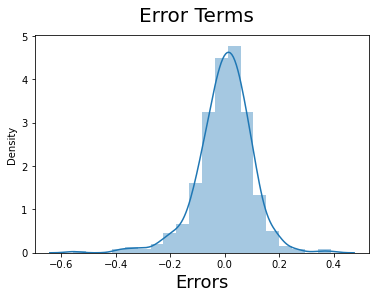

In [73]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Observations:
- Error terms is normally distributed with mean 0. So assumption of Linear Regression is valid.

Calculate residual

In [74]:
# residual calculations
res = y_train - y_train_pred
res

653    0.137964
576    0.057005
426   -0.001803
728   -0.156974
482   -0.050934
         ...   
526    0.021168
578    0.016772
53    -0.024913
350    0.120297
79    -0.053806
Length: 510, dtype: float64

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. ninth model.

#### Applying the scaling on the test sets

In [75]:
num_vars = ['FeelsLikeTemperature', 'Humidity', 'WindSpeed', 'Count']

# Apply scaling on test data set. We will use transform method, as we do not fit the test data set
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.describe()

,Year,Holiday,WorkingDay,FeelsLikeTemperature,Humidity,WindSpeed,Count,spring,summer,winter,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Good/Clear,Moderate/Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384,0.652968,0.319635
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472,0.477117,0.467403
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [76]:
# Divide test set into X_test and y_test

y_test = df_test.pop('Count')
X_test = df_test

In [77]:
#Selecting the same variables that were part of final model (Model 9).
column_test = X_train_rfe9.columns

X_test = X_test[column_test]

# Adding constant variable to test dataframe
X_test_lm9 = sm.add_constant(X_test)

X_test_lm9.head()

,const,Year,WorkingDay,FeelsLikeTemperature,WindSpeed,winter,Good/Clear,summer,Sept
184,1.0,0,0,0.769660,0.084219,0,0,0,0
535,1.0,1,1,0.842587,0.153728,0,1,1,0
299,1.0,0,1,0.496145,0.334206,1,0,0,0
221,1.0,0,1,0.795343,0.339570,0,1,0,0
152,1.0,0,1,0.741471,0.537414,0,1,1,0


In [78]:
# Making predictions using the final model (Model 9)

y_test_pred = lm.predict(X_test_lm9)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

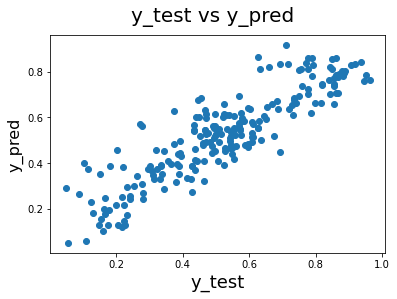

In [79]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

#### Observations:
- We can see there is linear relationship between y_test and y_test_pred

## Step 9: Residaul Analysis

In [80]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 78.17
Train data r^2 : 80.11


##### Adjusted R^2 Value for TEST
Adjr2=1−(1−R2)∗(n−1)/(n−p−1)

In [81]:
# n for test data ,n1 for train data is number of rows
n = X_test.shape[0]
n1 = X_train_rfe8.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = X_test.shape[1]
p1 = X_train_rfe8.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 77.34
Train data adjusted r^2 : 79.75


# Final Observations
##### Test data r^2 : 78.17

##### Train data r^2 : 80.11

##### Test data adjusted r^2 : 77.34

##### Train data adjusted r^2 : 79.75

This seems to be a really good model that can very well 'Generalize' various datasets.

### As per our final Model, the below predictor variables influences bike booking :

Feels Like Temperature

Year

Speed of the Wind

Winter Season

September Month

If the weather is Good/Clear

Summer Season

If its a working day

### Final model coefficient values:

Constant: 0.0176<br>
FeelsLikeTemperature: 0.5744<br>
Year:  0.2371<br>
WindSpeed: -0.1559<br>
Winter: 0.1136<br>
Sept: 0.0953<br>
Good/Clear: 0.0947<br>
Summer: 0.0836<br>
WorkingDay: 0.0224<br>

### The equation of best fitted surface based on Final Model:

Count = 0.0176 + (FeelsLikeTemperature × 0.5744) + (Year × 0.2371) − (WindSpeed × 0.1559) + (Winter × 0.1136) + (Sept × 0.0953) + (Good/Clear × 0.0947) + (Summer × 0.0836) + (WorkingDay × 0.0224)

### Interpretation of Coefficients:

**FeelsLikeTemperature:** A coefficient value of ‘0.5744’ indicates that a unit increase in FeelsLikeTemperature variable, increases the bike hire numbers by 0.5744 units.

**Year:** A coefficient value of ‘0.2371’ indicates that a unit increase in Year variable increases the bike hire numbers by 0.2371 units.

**WindSpeed:** A coefficient value of ‘-0.1559’ indicates that a unit increase in WindSpeed variable, decreases the bike hire numbers by 0.1559 units.

**Winter:** A coefficient value of ‘0.1136’ indicates that a unit increase in Winter variable increases the bike hire numbers by 0.1136 units.

**Sept:** A coefficient value of ‘0.0953’ indicates that a unit increase in Sept variable increases the bike hire numbers by 0.0953 units.

**Good/Clear:** A coefficient value of ‘0.0947’ indicates that a unit increase in Good/Clear variable increases the bike hire numbers by 0.0947 units.

**Summer:** A coefficient value of ‘0.0836’ indicates that a unit increase in Summer variable increases the bike hire numbers by 0.0836 units.

**WorkingDay:** A coefficient value of ‘0.0224’ indicates that a unit increase in WorkingDay variable increases the bike hire numbers by 0.0224 units.

**const:** The Constant value of ‘0.0176’ indicates that, in the absence of all other predictor variables, The bike rental can still increase by 0.0176 units.